In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [4]:
FS_data_arr

array([['105', '109', '108', '35', '115', '241', '20', '24', '29', '22',
        '21', '132', '222', '128', '25', '12', '101', '34', '37', '23',
        '67', '197', '32', '0', '232', '62', '183', '129', '31', '14',
        '165', '111', '15', '151', '143', '47', '233', '211', '123',
        '176', '58', '113', '11', '99', '199', '118', '74', '120', '3',
        '2', '163', '131', '68', '122', '119', '112', '148', '127',
        '114', '155', '174', '59', '102', '166', '73', '46', '124',
        '226', '179', '181', '164', '158', '10', '218', '69', '26',
        '225', '156', '178', '63', '172', '238', '27', '182', '188',
        '66', '193', '16', '135', '88', '83', '140', '159', '72', '116',
        '50', '96', '48', '149', '42'],
       ['15.61544', '14.437032', '12.2154255', '11.952938', '11.111277',
        '10.368264', '10.28379', '10.229364', '10.099115', '9.955227',
        '9.9396305', '9.924215', '9.922382', '9.910545', '9.905129',
        '9.889717', '9.851477', '9.835949', 

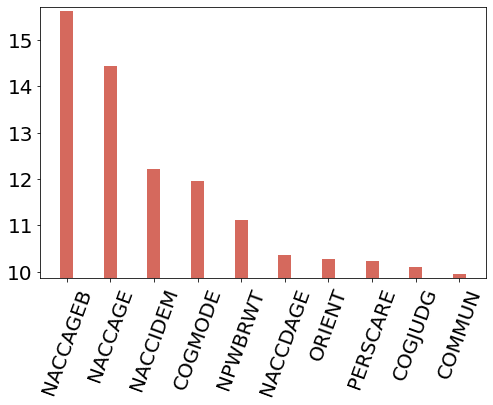

In [5]:
import matplotlib.pyplot as plt
import numpy as np

used_number_features=10

fz=20
params = {
    'figure.figsize': '8, 5'
}
plt.rcParams.update(params)

labels=FS_data_arr[-1,:][0:used_number_features]
data=((FS_data_arr[1,:]).astype(float))[0:used_number_features]
width=0.3

Max_Samples=np.max(data)+0.1
Min_Samples=np.min(data)-0.1

for i in np.arange(len(data)):
    rects_1=plt.bar(i,data[i],width,label=labels[0],color='#d5695d')
plt.title('')
plt.ylim(Min_Samples,Max_Samples)
plt.yticks(fontsize=fz)
plt.xticks(np.arange(len(data)),labels,fontsize=fz,rotation=70)
plt.xlabel('')
plt.show()